In [25]:
# external libraries for visualizations and data manipulation
# ensure that these packages have been installed prior to calls
import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
import seaborn as sns  # pretty plotting, including heat map
np.set_printoptions(precision=3)

import os
os.getcwd()
os.chdir('C:\\Users\\enisbe\\Google Drive New\\NW\\MSDS 422\\Data\\')
covid = pd.read_csv('COVID19_4122020.csv')
pd.options.display.float_format = '{:.3f}'.format
sns.set()

In [26]:
#Convert date to pandas date
covid.Date = pd.to_datetime(covid.Date,format="%m/%d/%Y")



#To simplfy the analysis we will take only first 15 state that have the largest 
summary_of_case = pd.Series(covid.groupby('geoId')['cases'].sum().transform(pd.Series.sort_values, ascending=False))
summary_of_case = pd.DataFrame(summary_of_case).reset_index()
listFilter = summary_of_case.geoId.tolist()
listFilter =listFilter[0:15]
covid = covid[covid['geoId'].isin(listFilter)] 

#create some variables transformations such as cases per million, death per million, empirical double time for deaths and cases 

covid = covid.sort_values(by=['geoId','Date'], ascending=[False,True])
covid['cum_cases'] = covid.groupby('geoId')['cases'].cumsum()
covid['cum_deaths'] = covid.groupby('geoId')['deaths'].cumsum()
covid['mortality_rate'] = covid['cum_deaths']/covid['cum_cases'] 
covid['case_change']=covid.groupby(['geoId'])['cum_cases'].pct_change()
covid['death_change']=covid.groupby(['geoId'])['cum_deaths'].pct_change()
covid['case_change']=covid.case_change.fillna(0)
covid['death_change']=covid.death_change.fillna(0)
covid['case_change_roll3']= covid.case_change.rolling(3 ).mean()
covid['death_change_roll3']= covid.death_change.rolling(3 ).mean()
covid['case_change_roll3']=covid.case_change.fillna(0)
covid['death_change_roll3']=covid.death_change.fillna(0)
covid['double_time_case']  = 1/covid.case_change_roll3
covid['double_time_deaths']  = 1/covid.death_change_roll3
covid['cum_cases_per_million'] = covid['cum_cases']/(covid['popData2018']/1000000)
covid['new_cases_per_million'] = covid['cases']/(covid['popData2018']/1000000)
covid['cum_death_per_million'] = covid['cum_deaths']/(covid['popData2018']/1000000)
covid['new_death_per_million'] = covid['deaths']/(covid['popData2018']/1000000)
covid.replace([np.inf, -np.inf], np.nan,inplace=True)

 
covid.replace([np.inf, -np.inf], np.nan,inplace=True)


import copy
covid_gt100 = covid.copy() 
covid_gt100 = covid_gt100[covid_gt100.cum_cases >=100]
covid_gt100['days_since_100']= covid_gt100.groupby('geoId').cumcount()


----------  Average Cases per Million ----------------
592.0 

----------  Average Deaths per Million ----------------
40.0 



Text(0.5, 1.0, 'Cases per million by Country')

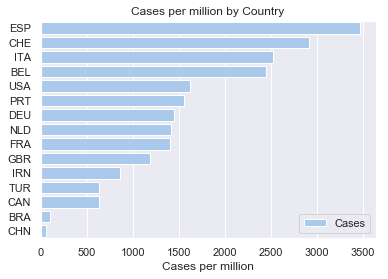

In [27]:
df_deaths= pd.DataFrame(covid.groupby('countryterritoryCode')['cum_death_per_million'].max().transform(pd.Series.sort_values,ascending=False)).reset_index()
df_cases = pd.DataFrame(covid.groupby('countryterritoryCode')['cum_cases_per_million'].max().transform(pd.Series.sort_values,ascending=False)).reset_index()

total_pop = covid.groupby('countryterritoryCode')['popData2018'].max().sum()

print("----------  Average Cases per Million ----------------")
print(round(covid['cases'].sum()/(total_pop/1000000),0), "\n")
 
print("----------  Average Deaths per Million ----------------")
print(round(covid['deaths'].sum()/(total_pop/1000000),0), "\n")

f, ax = plt.subplots()
sns.set_color_codes("pastel")
sns.barplot(x="cum_cases_per_million", y="countryterritoryCode", data=df_cases,label="Cases", color="b")
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="", xlabel="Cases per million")
plt.title("Cases per million by Country")